In [2]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
# Loading the data into pandas
df = pd.read_csv('data/german_data_train.csv')
numdf = pd.read_csv('data/german_num_data_train.csv')
df.head()

,account_status,duration(months),credit_history,purpose,credit_amount,savings_account,employment,installment_rate,sex,status,...,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign,fraud
0,... < 0 DM,6,other credits existing(not this bank),radio/tv,1169,no savings account,... >= 7 years,4,male,single,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/tv,5951,... < 100 DM,1 <= ... < 4 years,2,female,divorced/separated/married,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,no checking account,12,other credits existing(not this bank),education,2096,... < 100 DM,4 <= ... < 7 years,2,male,single,...,real estate,49,none,own,1,unskilled(resident),2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male,single,...,life insurance,45,none,free,1,skilled employee,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car(new),4870,... < 100 DM,1 <= ... < 4 years,3,male,single,...,no property,53,none,free,2,skilled employee,2,none,yes,2


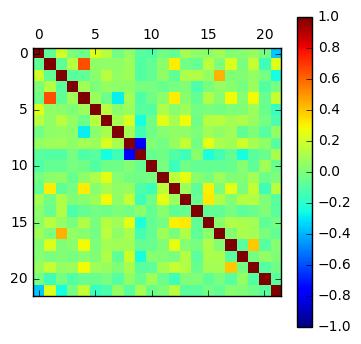

In [4]:
# Creating a correlation matrix to see which variables are the most correlated to each other
correlations = numdf.corr()
cax = plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.figure(figsize=(15, 15))
plt.show()

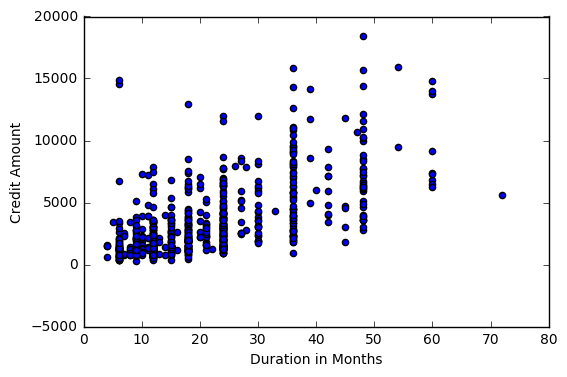

In [5]:
# Creating a scatter plot to show the relationship between duration and credit amount
x = df['duration(months)']
y = df['credit_amount']
plt.scatter(x, y)
plt.xlabel('Duration in Months')
plt.ylabel('Credit Amount')
plt.show()

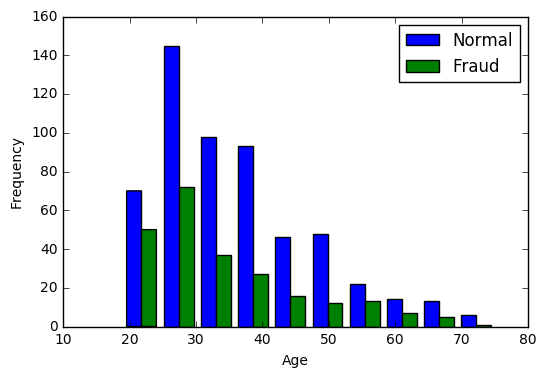

In [6]:
# Histogram showing the distribution of ages comparing normal activity to fraudulent activity
x = df[df['fraud'] == 1]['age']
y = df[df['fraud'] == 2]['age']
plt.hist([x, y], label=['Normal', 'Fraud'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

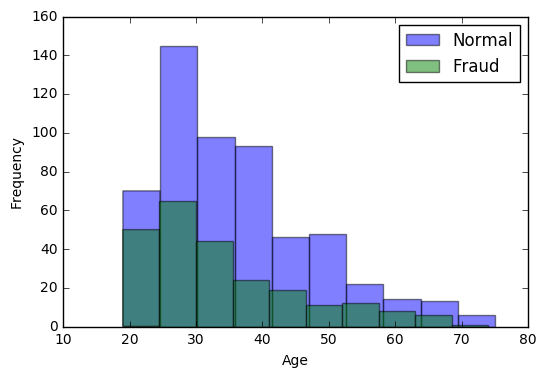

In [7]:
# Same histogram as about except they overlap instead of being side to side
x = df[df['fraud'] == 1]['age']
y = df[df['fraud'] == 2]['age']
plt.hist(x, alpha=0.5, label='Normal')
plt.hist(y, alpha=0.5, label='Fraud')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
# Text based correlation  
print(df.corr())

                  duration(months)  credit_amount  installment_rate  \
duration(months)          1.000000       0.619350          0.073130   
credit_amount             0.619350       1.000000         -0.285533   
installment_rate          0.073130      -0.285533          1.000000   
residence                 0.021135       0.010142          0.071388   
age                      -0.031034       0.041748          0.071211   
existing_credits         -0.026905      -0.003384          0.024737   
people_liable            -0.027220       0.017813         -0.066625   
fraud                     0.244485       0.165173          0.060053   

                  residence       age  existing_credits  people_liable  \
duration(months)   0.021135 -0.031034         -0.026905      -0.027220   
credit_amount      0.010142  0.041748         -0.003384       0.017813   
installment_rate   0.071388  0.071211          0.024737      -0.066625   
residence          1.000000  0.273078          0.084435       0.

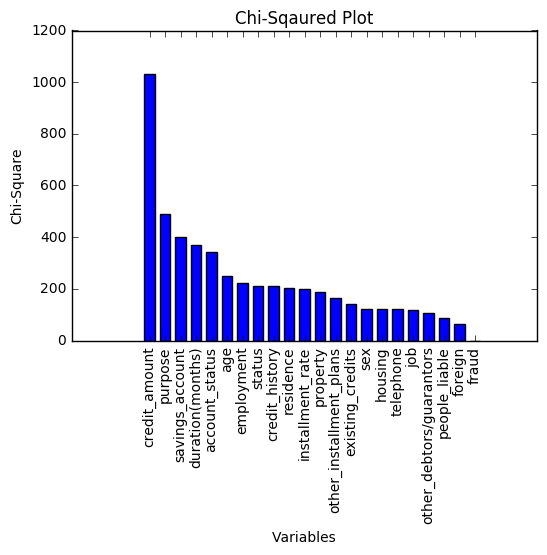

In [58]:
chi = []
for column in numdf:
    obs = np.array([numdf[column], numdf['fraud']])
    chi.append(chi2_contingency(obs)[0])

indices = np.argsort(chi)[::-1]

columns= []
for i in indices:
    name = numdf.columns[i]
    columns.append(name)

x = []
y = sorted(chi, reverse=True)
for i in range(len(y)):
    x.append(i)
plt.bar(x, y, width=0.7, align='center')
plt.xticks(x, columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Chi-Square')
plt.title('Chi-Sqaured Plot')
plt.show()

Feature ranking:
1. account_status (0.121213)
2. duration(months) (0.084667)
3. credit_amount (0.075199)
4. credit_history (0.066131)
5. age (0.065651)
6. purpose (0.054791)
7. employment (0.052484)
8. savings_account (0.052470)
9. property (0.051811)
10. installment_rate (0.048280)
11. residence (0.046409)
12. job (0.044120)
13. housing (0.035206)
14. other_installment_plans (0.033613)
15. existing_credits (0.031454)
16. status (0.030363)
17. telephone (0.029649)
18. other_debtors/guarantors (0.027304)
19. people_liable (0.021469)
20. sex (0.020980)
21. foreign (0.006735)


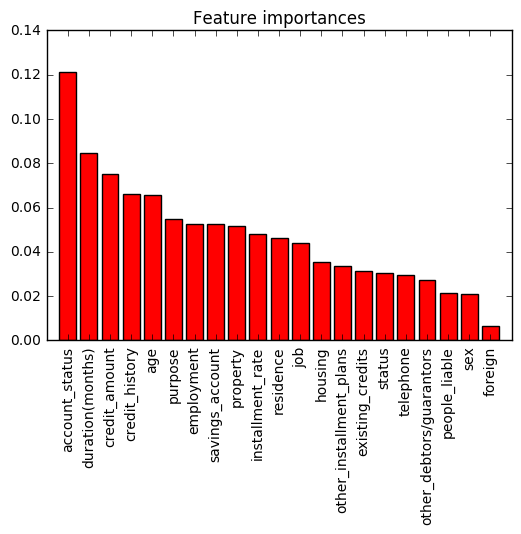

In [59]:
# Our variables for the classification task
X = np.array(numdf.drop(['fraud'], 1))
y = np.array(numdf['fraud'])

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
columns = []
for i in indices:
    name = numdf.columns[i]
    columns.append(name)
# print(columns)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
plt.xticks(range(X.shape[1]), columns, rotation='90')
plt.xlim([-1, X.shape[1]])
plt.show()

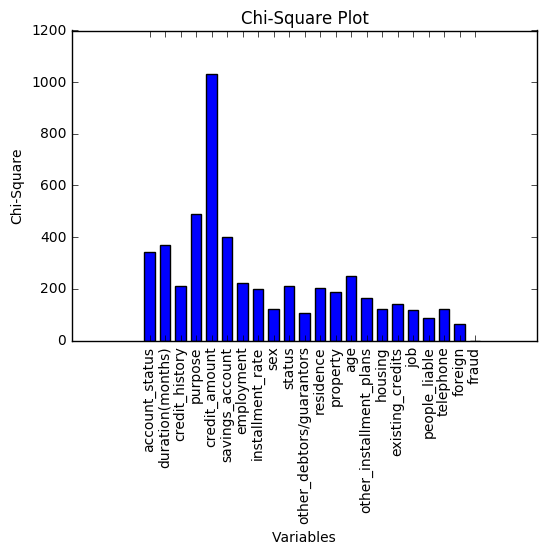

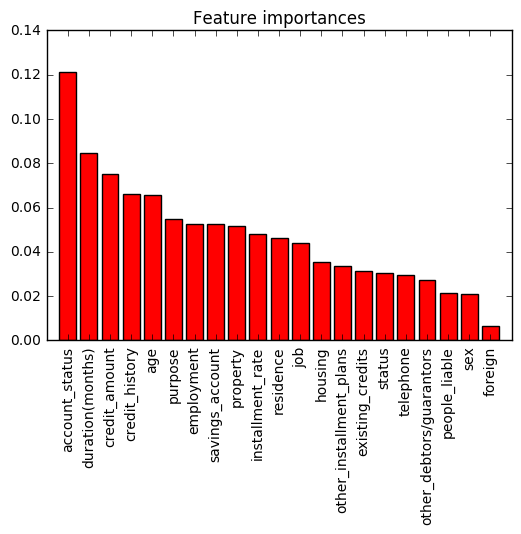

Feature ranking:
1. account_status (0.121213)
2. duration(months) (0.084667)
3. credit_amount (0.075199)
4. credit_history (0.066131)
5. age (0.065651)
6. purpose (0.054791)
7. employment (0.052484)
8. savings_account (0.052470)
9. property (0.051811)
10. installment_rate (0.048280)
11. residence (0.046409)
12. job (0.044120)
13. housing (0.035206)
14. other_installment_plans (0.033613)
15. existing_credits (0.031454)
16. status (0.030363)
17. telephone (0.029649)
18. other_debtors/guarantors (0.027304)
19. people_liable (0.021469)
20. sex (0.020980)
21. foreign (0.006735)


In [11]:
def explore(file, target):
    df = pd.read_csv(file)

    if len(set(df[target])) < 11:
        chi = []
        for column in df:
            obs = np.array([df[column], df[target]])
            chi.append(chi2_contingency(obs)[0])

        labels = []
        y = chi
        for i in range(len(y)):
            labels.append(i)
        plt.bar(labels, y, width=0.7, align='center')
        plt.xticks(labels, df.columns, rotation=90)
        plt.xlabel('Variables')
        plt.ylabel('Chi-Square')
        plt.title('Chi-Square Plot')
        plt.show()
    else:
        correlations = df.corr()
        cax = plt.matshow(correlations, vmin=-1, vmax=1)
        plt.colorbar(cax)
        plt.figure(figsize=(15, 15))
        plt.show()

    # Our variables for the classification task
    X = np.array(df.drop([target], 1))
    y = np.array(df[target])

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = []
    for i in indices:
        name = df.columns[i]
        columns.append(name)
        
    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
    plt.xticks(range(X.shape[1]), columns, rotation='90')
    plt.xlim([-1, X.shape[1]])
    plt.show()

    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

explore('data/german_num_data_train.csv', 'fraud')